In [23]:
import numpy as np
import pyswarms as ps

c1 = 50
c2 = 50
x1_f = 0.0
x2_f = 0.0
tf = 2.0
N = 20
dt = tf/N

x0 = np.array([1.0, 1.0])

def state_equations(u):
    M, N = u.shape
    X = np.zeros((M, N, 2))
    X[:, 0, :] = x0
    for i in range(1, N):
        X[:, i, 0] = X[:, i-1, 0] + dt * X[:, i-1, 1]
        X[:, i, 1] = X[:, i-1, 1] + dt * u[:, i-1]
    return X

def cost_function(u):
    X = state_equations(u)
    x1_coeff = c1 * (X[:, -1, 0] - x1_f)**2
    x2_coeff = c2 * (X[:, -1, 1] - x2_f)**2
    integral = 0.5 * np.sum(u**2, axis=1) * dt
    return x1_coeff + x2_coeff + integral

# Define bounds for u
bounds = (-1 * np.ones(N), 1 * np.ones(N))

# Initialize the optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 1}
optimizer = ps.single.LocalBestPSO(n_particles=10, dimensions=N, options=options, bounds=bounds)

# Perform optimization
best_cost, best_u = optimizer.optimize(cost_function, iters=1000)

# Print the optimal control
print("Optimal control u(t):", best_u)
    

2024-06-30 12:18:57,718 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 1}
pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=199
2024-06-30 12:18:58,259 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 199.0469152913804, best pos: [-0.76634827 -0.53458447 -0.40324859 -0.53842792 -0.67651157 -0.95531376
 -0.64566769 -0.60564481  0.0133097  -0.58620137 -0.78544178 -0.44693469
 -0.12276087 -0.40393676  0.60883291 -0.70497517  0.13894623 -0.70887715
 -0.47787461 -0.35081117]


Optimal control u(t): [-0.76634827 -0.53458447 -0.40324859 -0.53842792 -0.67651157 -0.95531376
 -0.64566769 -0.60564481  0.0133097  -0.58620137 -0.78544178 -0.44693469
 -0.12276087 -0.40393676  0.60883291 -0.70497517  0.13894623 -0.70887715
 -0.47787461 -0.35081117]


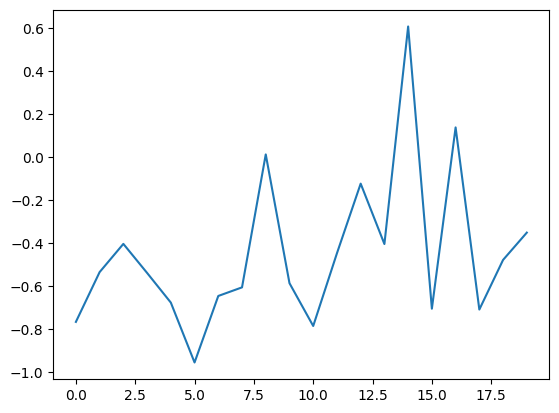

In [24]:
import matplotlib.pyplot as plt
plt.plot(best_u)